In [1]:
# Install scikit-learn if first time

#!pip install scikit_learn

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

### Logistic Regression Model

- Estimates the probability that an input belongs to a particular class (e.g., 0 or 1)

In [4]:
# Load the dataset
df = pd.read_csv('Clean_data.csv')

In [5]:
# Drop the ID column
df.drop(columns = ['ID'], inplace = True)

In [6]:
# Label Encoding for categorical datasets

#Select categorical columns
categorical_columns = df.select_dtypes(include = 'O').columns

# Initialize LabelEncoder instance
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the df
df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,3,0,0,0,0,0,1,116500,3.99,...,3,758,0,0,1,98.728814,3,1,1,45.0
1,0,2,0,1,0,0,0,0,206500,3.99,...,2,552,1,3,1,75.135870,0,1,1,39.0
2,0,2,1,0,0,0,0,1,406500,4.56,...,3,834,0,1,1,80.019685,3,1,0,46.0
3,0,2,0,0,3,0,0,1,456500,4.25,...,3,587,0,2,0,69.376900,0,1,0,42.0
4,0,1,1,0,0,0,0,1,696500,4.00,...,1,602,1,0,0,91.886544,0,1,0,39.0


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.755
Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     33687
           1       1.00      0.00      0.00     10914

    accuracy                           0.76     44601
   macro avg       0.88      0.50      0.43     44601
weighted avg       0.82      0.76      0.65     44601



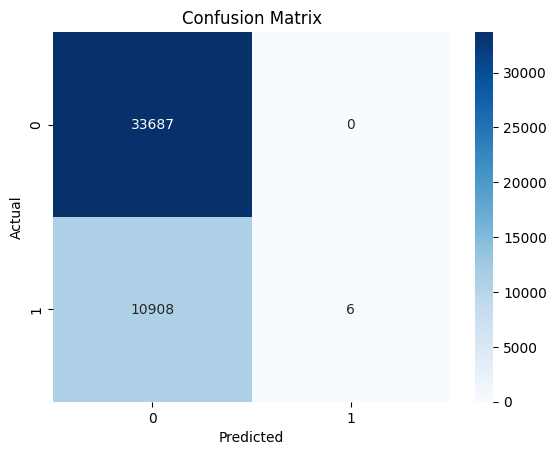

In [12]:
# Define features and target variables
X = df.drop('Status', axis = 1)
y = df['Status']

# Split the data into training and testing tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# create an Instance of the logistic regression class
model = LogisticRegression()

#  the model
model.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)

# Print the results
print("Accuracy:", round(accuracy,3))

# cofusion Matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Classification Report
print("Report:\n", class_report)

My Logistic Model has an accuracy of 76%